In [20]:
import numpy as np

# Generate random values to be used to create
# random inductance(L)
a_l = np.random.randint(10, 99 + 1)
b_l = np.random.randint(-9, -5 + 1)
L = a_l * (10 ** b_l) # Henries

# Generate random values to be used to create
# random capacitance(C)
a_c = np.random.randint(10, 99 + 1)
b_c = np.random.randint(-9, -5 + 1)
C = a_c * (10 **b_c)

# Determine the values of R
r_under = 0.2 * np.sqrt(L / C) # Resistor value - underdamped
r_critical = 2 * np.sqrt(L / C) # Resistor value - critically damped
r_over = 10 * np.sqrt(L / C) # Resistor value - overdamped
r_arr = np.array([[r_under, "Underdamped"], 
    [r_critical, "Critically Damped"],
    [r_over, "Overdamped"]], dtype=object) # Array containing all R values


94


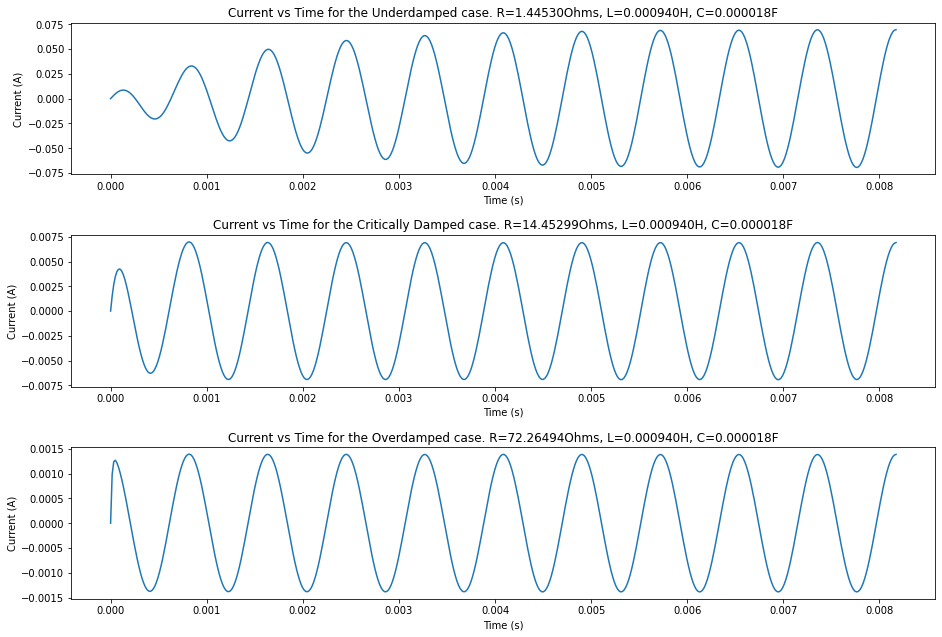

In [53]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constant definitions

omega0 = 1 / np.sqrt(L * C) # Frequency at time 0
omega = omega0 # Frequency
v0 = 0.1 # Circuit voltage in volts
q0 = 0 # Initial charge at time 0
i0 = 0 # Initial current at time 0
period = (2 * np.pi) / omega # One period
initial_arr = np.array([q0, i0]) # Initial values q0 and i0
t_arr = np.linspace(0, period * 10, 500) # Time array defined based on period

# Function definitions

def dqqt_arr(t, initial_array, R, w):
    """
    A functions that returns a numpy array containing
    the first and second derivatives of charge based on
    the given initial conditions

    Keyword arguments:
    t -- time in seconds (can be a single number or an array of numbers)
    initial_array -- The initial conditions of the differential equation
    R -- The given resistor of the circuit
    w -- The omega (frequency) value
    """

    q = initial_array[0] # Charge q

    # First order derivative of charge
    dq_dt = initial_array[1] # Current I = dq/dt

    # Second order derivative of charge
    dq2_dt2 = 1 / L * v0 * np.cos(w * t) - (R / L * dq_dt) - (1 / (L * C) * q) # dI/dt

    # Return an array containing first and second order derivatives
    return np.array([dq_dt, dq2_dt2])


# An array to store the solutions of each resistor value
# when solving the differential equation.
solutions = np.array([], dtype=object)

# Prepare the plot figure to be used in the loop
plt.figure(figsize=(15, 10))

# Plot variables
plt_nrows = len(r_arr) # The num of rows of the subplots
plt_ncols = 1 # The num of columns of the subplot

# Add plot spacing
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

# Loop over each resistor value and case and solve the differential equation
# based on them. Append the values to the solutions array.
for index, resistor in enumerate(r_arr):
    # Solve the differential equation using solve_ivp for each
    # resistor value in the loop and store it in a variable 'sol'.
    sol = solve_ivp(dqqt_arr, (t_arr[0], t_arr[-1]),
                    initial_arr,
                    t_eval=t_arr,
                    args=(resistor[0], omega),
                    method='LSODA')

    # Append to the solutions variable
    solutions = np.append(solutions, sol)

    # Create the subplot for each resistor
    plt.subplot(plt_nrows, plt_ncols, index + 1)

    # Plot the time vs current values solved by the solve_ivp
    plt.plot(t_arr, sol['y'][1])

    # Add plot information (title, x and y label)
    plt.title(f"Current vs Time for the {resistor[1]} case. R={resistor[0]:.5f}Ohms, L={L:.6f}H, C={C:.6f}F")
    plt.ylabel("Current (A)"); plt.xlabel("Time (s)")
    

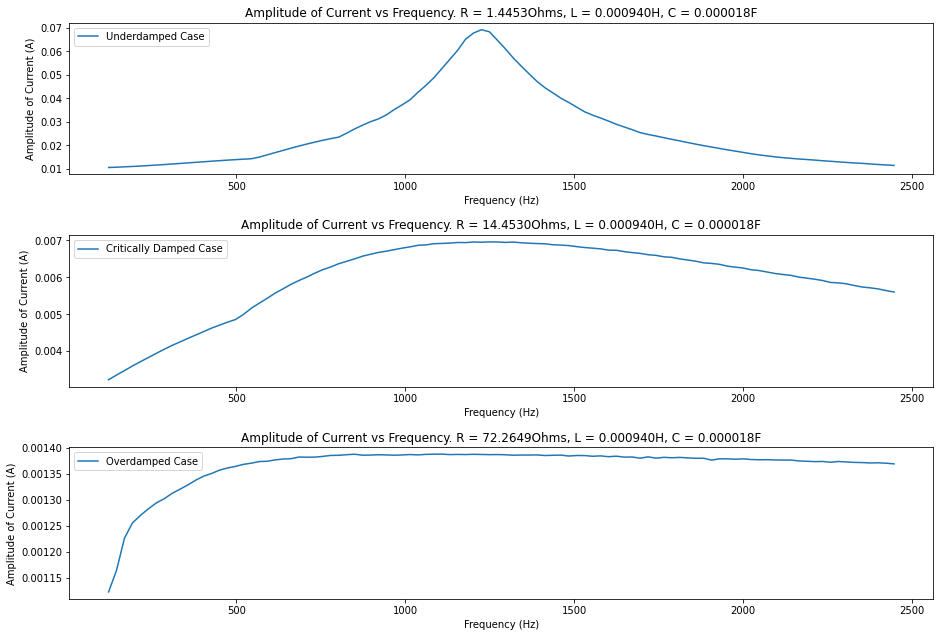

In [66]:
# Define the range of frequencies
interval = 100
omega_list = np.linspace(0.1 * omega, 2 * omega, interval)

# Create the current amplitude array for the under, critical
# and over damped cases with prefilled values and data types
# for eliminating the need of appending and re-assigning memory.

# The under damped current amplitudes
amp_under = np.linspace(0, 1, interval, dtype=np.float32) 

# The critically damped current amplitudes
amp_critical = np.linspace(0, 1, interval, dtype=np.float32)

# The over damped current amplitudes
amp_over = np.linspace(0, 1, interval, dtype=np.float32)

# An array containing a reference of all 3 cases of current amplitudes.
amp_arr = np.array([amp_under, amp_critical, amp_over], dtype=object)

# Loop over all the omega values
for i, w in enumerate(omega_list):
    # Loop over all resistor values (under, critical,
    # and over damped)
    for j, resistor in enumerate(r_arr):
        # Solve the differential equation for each value
        # of omega (w) and resistors 
        sol = solve_ivp(dqqt_arr, (t_arr[0], t_arr[-1]),
                    initial_arr,
                    t_eval=t_arr,
                    args=(resistor[0], w),
                    method='LSODA')
        
        # Get a reference to the current values returned by the
        # solve_ivp for faster access in calculations.
        I_sol = sol['y'][1]

        # Calculate the .... FIXME
        max_minus_min = np.max(I_sol) - np.min(I_sol)
        amp_arr[j][i] = max_minus_min / 2

# Convert the omega to frequency in Hertz (w = 2 * pi * f)
omega_list = omega_list / (2 * np.pi)

# Create the plot figure and set the figure size
plt.figure(figsize=(15, 10))

# Plot constants definitions
plt_f_nrows = 3 # Num of subplot rows
plt_f_ncols = 1 # Num of subplot columns

# Add plot spacing
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)


# For each of the amplitudes create a subplot and plot them
for i, amp in enumerate(amp_arr):
    # Create subplot for each case (under, critical, and over damped)
    plt.subplot(plt_f_nrows, plt_f_ncols, i + 1)

    # Plot the amplitudes of each case vs the frequency
    plt.plot(omega_list, amp)
    # Add plot title and axes labels
    plt.title(f"Amplitude of Current vs Frequency. R = {r_arr[i][0]:.4f}Ohms, L = {L:.6f}H, C = {C:.6f}F")
    plt.xlabel("Frequency (Hz)"); plt.ylabel("Amplitude of Current (A)")

    # Add a legend to show which resistance case this plot illustrates
    plt.legend([f"{r_arr[i][1]} Case"], loc="upper left")

